# Library, def, class

In [ ]:
! pip install lightgbm
! pip install catboost
! pip install mlxtend
! pip install scikit-feature
! pip3 install catboost

     |████████████████████████████████| 69.2 MB 5.1 kB/s 
ERROR: Could not find a version that satisfies the requirement scikit-feature (from versions: none)
ERROR: No matching distribution found for scikit-feature


In [ ]:
import pandas as pd
import numpy as np
import os

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, VotingClassifier, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMRegressor
import xgboost as xgb

from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.model_selection import cross_val_score
 
import seaborn as sns
import matplotlib.pyplot as plt
 
from sklearn.metrics import r2_score, roc_auc_score, classification_report, f1_score, precision_score, recall_score, confusion_matrix

from sklearn.decomposition import PCA, TruncatedSVD 

from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler, OneHotEncoder

from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE
import os

import catboost
import catboost as catb
from catboost import CatBoostClassifier, CatBoostRegressor
from catboost import cv
from catboost import *
import xgboost
import lightgbm as lgb

from sklearn.manifold import TSNE

from tqdm import tqdm

import random

pd.set_option('display.max_rows', 500)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
def show_proba_calibration_plots(y_predicted_probs, y_true_labels):
    preds_with_true_labels = np.array(list(zip(y_predicted_probs, y_true_labels)))

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in np.linspace(0.1, 0.9, 9):
        thresholds.append(threshold)
        precisions.append(precision_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        recalls.append(recall_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        f1_scores.append(f1_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
         
    figure = plt.figure(figsize = (10, 5))

    plt1 = figure.add_subplot(111)
    plt1.axhline(0.5, color="red")
    plt1.plot(thresholds, precisions, label='Precision', linewidth=4)
    plt1.plot(thresholds, recalls, label='Recall', linewidth=4)
    plt1.plot(thresholds, f1_scores, label='F1', linewidth=4)
    plt1.set_ylabel('Scores')
    plt1.set_xlabel('Probability threshold')
    plt1.set_title('Probabilities threshold calibration')
    plt1.legend(bbox_to_anchor=(0.25, 0.25));

In [ ]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print(confusion_matrix(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print(confusion_matrix(y_test_true, y_test_pred))
def get_classification_report_TEST(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print(confusion_matrix(y_test_true, y_test_pred))

In [ ]:
def for_cla():
  test__CLA = ob_all.data[ob_all.data['is_CLA'] == 1][ob_all.feature_list_init]
  train_CLA = ob_all.data[ob_all.data['is_CLA'] == 0][ob_all.feature_list_init]
  train_CLA_cut = train_CLA.select_dtypes(exclude =('int', 'float')).columns
  train_CLA_num = train_CLA.select_dtypes(include =('int', 'float')).columns

  cat_CLA = catb.CatBoostRegressor(iterations=371, 
                                    nan_mode='Min',
                                    # eval_metric=params['custom_loss'] , 
                                    silent=True, 
                                    # early_stopping_rounds=20,
                                    random_state=42,
                                    learning_rate = 0.05, 
                                    depth = 3)

  cat_CLA.fit(train_CLA.drop(columns = 'Current Loan Amount'), train_CLA['Current Loan Amount'], 
              cat_features=train_CLA_cut)

  test__CLA['pridicted_CLA'] = cat_CLA.predict(test__CLA.drop(columns = 'Current Loan Amount'))
  dict_CLA = test__CLA[['pridicted_CLA']].to_dict()['pridicted_CLA']
  dd = np.where(ob_all.data['is_CLA'] == 1, ob_all.data.index.map(dict_CLA), ob_all.data['Current Loan Amount'])
  ob_all.data['Current Loan Amount'] = dd

In [ ]:
def new_features(data, col):
    isin = []
    df = pd.DataFrame()
    feature_list = ['Annual Income', 'Maximum Open Credit', 
                    'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt'
                   ]
    
    for en1, col1 in tqdm(enumerate(col)):
        for en2, col2 in enumerate(col):
            if en1 < en2:
                
                df[col1 + '-' + col2 + '_' + 'diff'] = data[col1] - data[col2]
                # df[col1 + '-' + col2 + '_' + 'ratio'] = np.where(data[col2] == 0, 1000000, data[col1] / data[col2])
                # df[col1 + '-' + col2 + '_' + 'mult'] = data[col1] * data[col2]
                # df[col1 + '-' + col2 + '_' + 'sum']  = data[col1] + data[col2]
    return df

In [ ]:


#  test 0.57534 200итер

# FeatureSelect

In [ ]:
class Feature_Selection():

  def Univariate(self, strategy, X_train, y_train, down, up, k, feature, price = 'Price'):
    if strategy == 'corr':
      X_train = X_train[feature + [price]]
      corr = X_train[X_train.columns[X_train.isna().sum() == 0]].corr()[[price]].sort_values(price)
      corr_feature = (corr[(corr[price] < down) | (corr[price] > up)])
      corr_feature = corr_feature.index
      corr_feature = corr_feature.drop(price)
      self.X_train_corr = X_train[corr_feature]

    if strategy == 'SelectKBest':
      X_train = X_train[feature]
      X_train = X_train[X_train.columns[X_train.isna().sum() == 0]]
      self.X_train_SelectKBest = SelectKBest(mutual_info_regression, k = k).fit_transform(X_train.iloc[:,:], y_train)

    if strategy == 'info':
      pass

  def drop_correl_columns(self, DATA, corr = 0.8):
    correlated_features = set()
    correlation_matrix = DATA.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > corr:
                colname = correlation_matrix.columns[i]
                correlated_features.add(colname)


    self.data_no_corr = DATA.drop(labels=correlated_features, axis=1, inplace=True)
    # test_features.drop(labels=correlated_features, axis=1, inplace=True)

  def wrap(self, type_, train, train_labels):
    
    feature_selector = SequentialFeatureSelector(RandomForestRegressor(n_jobs = -1),
           k_features=5,
           forward = True,
           verbose=2,
           scoring='r2',
           cv=4)
    features = feature_selector.fit(train.fillna(0), train_labels)
    filtered_features= train.columns[list(features.k_feature_idx_)]
    self.RF_feature = train[filtered_features]


  def rfecv(self, X_train, y_train):
    rfecv = RFECV(estimator = RandomForestRegressor(n_jobs = -1), step = 1, cv = 3, scoring = 'f1')
    rfecv = rfecv.fit_transform(X_train, y_train)
    # rfecv.n_features_
    self.rfecv = X_train[X_train.columns[rfecv.support_]]
    # rfecv.grid_scores_


# Корректировка данных

In [ ]:
def spleet_train_test_all(DATA, *args):
  all = pd.DataFrame()
  for arg in args:
    all = pd.concat([all, DATA[DATA['label'] == arg]])
  return all

def category(data, label, type_):
  # data = ob_train_train.X_train
  # label = 'DistrictId'
  # type_ = 'category'
  data[[label]] = data[[label]].astype(type_)

In [ ]:
# quant_ = 'quant-DistrictId-Square-count'
# price_ = 'price1Square'
# DATA_ = ob_all.data
name = ""
# bins = 75
def plot_quant(quant_, price_, DATA_, name = name):
  plt.figure(figsize = (15, 8))  
  for i in (range(len(DATA_[quant_].unique()))):
    if len(quant_.split('-')) > 2:
      for_ii = '-'.join(quant_.split('-')[1:])
    else:
      for_ii = quant_.split('-')[-1]
    # print(for_ii)
    ii = round(DATA_[DATA_[quant_] == i][for_ii].mean(), 2)
    data = DATA_[DATA_[quant_] == i][price_]
    plt.hist(data, bins = bins, alpha = 0.95, label = ii)
    plt.title(str(name) + price_ + '___for:' + quant_)
    plt.legend()
    plt.xlim(1000, 7000)
    
  plt.show()

def plot_quant_one(quant_, price_, DATA_, name = name):
  fig, axs = plt.subplots(len(DATA_[quant_].unique()), 1)
  fig.set_size_inches(10, 10)
  fig.subplots_adjust(wspace = 0.5, hspace = 0.5)
  
  for i in (range(len(DATA_[quant_].unique()))):
    if len(quant_.split('-')) > 2:
      for_ii = '-'.join(quant_.split('-')[1:])
    else:
      for_ii = quant_.split('-')[-1]
    ii = round(DATA_[DATA_[quant_] == i][for_ii].mean(), 2)
    # # # display('Square со средней {}'.format(int(DATA_[DATA_[quant_] == i]['Square'].mean())))
    data = DATA_[DATA_[quant_] == i][price_]
    axs[i].hist(DATA_[DATA_[quant_] == i][price_], bins = bins)
    axs[i].vlines((DATA_[DATA_[quant_] == i][price_].mean()), 0, 100, color = 'r')
    axs[i].set_xlim(1000, 7000)
    axs[i].set_title('Square со средней {}'.format(round(DATA_[DATA_[quant_] == i]['Square'].mean()),2))

# Class

In [ ]:
class Preprocess():
  def __init__(self, data):
    self.data = data.copy()
    self.feature_list_init = ['Home Ownership', 'Annual Income', 'Years in current job', 'Tax Liens',
       'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems',
       'Months since last delinquent', 'Bankruptcies', 'Purpose', 'Term',
       'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt',
       'Credit Score']

    self.outer_list = ['Home Ownership', 'Years in current job', 'Tax Liens', 'Number of Credit Problems', 'Bankruptcies', 'Purpose', 'Term']
    self.featcat_list = ['Home Ownership', 'Years in current job', 'Tax Liens', 'Number of Credit Problems', 'Bankruptcies', 'Purpose', 'Term']
    self.featnum_list = ['Annual Income', 'Number of Open Accounts', 'Years of Credit History', 'Maximum Open Credit', 'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt', 'Credit Score']
    self.featdro_list = ['Months since last delinquent']
    self.feature_list_preprose = []
    self.feature_list_district = []
    self.feature_list_outer = []
    self.quant_list = []
    self.no_quant_list = []
    self.no_feature_list = ['Credit Default']

  def remove_test(self):
    for i in [ob_all.featcat_list][0]:
      display(pd.pivot_table(all,
                    columns = 'label2',
                    index = i,
                    values = 'Maximum Open Credit',
                    aggfunc = ['count']
                    ))
    
  def __setitem__(self, index, name):
    self.data[self.data['label'] == 'train_train'] == 'my_train_train'
    self.data[self.data['label'] == 'test'] == 'my_test'

  def __getitem__(self, index):
    return self.data[self.data['label'] == index]
  
  def fill(self, strategy, column, column2, column3):
    pass

  def district_engenering(self, index, dict_item, aggfunc, DATA):

    for i in list(range(len(dict_item))):
      if dict_item[i] != index:        
        dict = pd.pivot_table(DATA,
                      index = index,
                      values = [dict_item[i]],
                        aggfunc = aggfunc
                      ).to_dict()

        for ii in aggfunc:
          self.data[index + '-'+ str(dict_item[i]) + '-' + ii] = self.data[index].map(dict[(ii, dict_item[i])])          
          self.feature_list_district.append(index + '-'+ str(dict_item[i]) + '-' + ii)
          if ii == 'mean':
            self.data[index + '-'+ str(dict_item[i]) + '-' + ii + '-Outer'] = self.data[dict_item[i]] - self.data[index + '-' + str(dict_item[i]) + '-' + ii]
            self.feature_list_outer.append(index + '-'+ str(dict_item[i]) + '-' + ii + '-Outer')
          else:
            continue
  def district_engenering_no_feature(self, index, dict_item, aggfunc, DATA):

    for i in list(range(len(dict_item))):
      if dict_item[i] != index:        
        dict = pd.pivot_table(DATA,
                      index = index,
                      values = [dict_item[i]],
                        aggfunc = aggfunc
                      ).to_dict()

        for ii in aggfunc:
          self.data[index + '-'+ str(dict_item[i]) + '-' + ii] = self.data[index].map(dict[(ii, dict_item[i])])          
          self.feature_list_district_no_feature.append(index + '-'+ str(dict_item[i]) + '-' + ii)
  
  def district_engenering_for_anal(self, index, dict_item, aggfunc, DATA, name = 'for_anal'):
    
    for i in list(range(len(dict_item))):
      if dict_item[i] != index:        
        dict = pd.pivot_table(DATA,
                      index = index,
                      values = [dict_item[i]],
                        aggfunc = aggfunc
                      ).to_dict()

        for ii in aggfunc:
          self.data[index + '-'+ str(dict_item[i]) + '-' + ii + '_' +name] = self.data[index].map(dict[(ii, dict_item[i])])          
          self.feature_list_district_for_anal.append(index + '-'+ str(dict_item[i]) + '-' + ii + '_' +name)

  def quantile(self, a, quant):    
    for i in a:
      self.data['quant-{}-{}'.format(quant, i)] = pd.qcut(self.data[i], quant, labels = False)
      self.quant_list.append('quant-{}-{}'.format(quant, i))


  def catch_no_feature(self):
    self.catch_price_list = [i for i in ob.data[ob.feature_list_outer] if i.split('-')[1] == 'Price' or i.split('-')[1] == 'price1Square'] + \
    [i for i in ob.data[ob.quant_list] if i.split('-')[-2] == 'Price' or i.split('-')[-2] == 'price1Square'] + \
    [i for i in ob.data[ob.feature_list_district] if i.split('-')[-2] == 'Price' or i.split('-')[-2] == 'price1Square']
    
  def create_X_train(self, feature, target, threshold, drop = 'none', label = ''):
    if drop == 'none':
      self.X_train = self.data[self.data['label'] != 'test']
      self.X_train = self.X_train[[target] + feature]
      self.X_train.dropna(axis = 0, inplace = True)      
      self.y_train = self.X_train[target]
      self.X_train = self.X_train[feature]
      display('убрали: {} число пропусков больше: {}'.format(self.X_train.columns[self.X_train.isna().sum() > threshold], threshold))
      self.X_train = self.X_train[self.X_train.columns[self.X_train.isna().sum() <= threshold]]
    if drop == 'drop':
      self.X_train = self.data[self.data['label'] != 'test']
      self.X_train = self.X_train[[target] + feature]
      self.X_train.dropna(axis = 0, inplace = True)
      self.y_train = self.X_train[target]
      self.X_train = self.X_train[feature]
      display('убрали: {} число пропусков больше: {}'.format(self.X_train.columns[self.X_train.isna().sum() > threshold], threshold))
      self.X_train = self.X_train[self.X_train.columns[self.X_train.isna().sum() <= threshold]]
    if drop == 'train_train':
      self.X_train_train = self.data[self.data['label'] == 'train_train']
      self.X_train_train = self.X_train_train[[target] + feature]
      self.X_train_train.dropna(axis = 0, inplace = True)
      self.y_train_train = self.X_train_train[target]
      self.X_train_train = self.X_train_train[feature]
      display('убрали: {} число пропусков больше: {}'.format(self.X_train_train.columns[self.X_train_train.isna().sum() > threshold], threshold))
      self.X_train_train = self.X_train_train[self.X_train_train.columns[self.X_train_train.isna().sum() <= threshold]]
    if drop == 'train_test':
      self.X_train_test = self.data[self.data['label'] == 'train_test']
      self.X_train_test = self.X_train_test[[target] + feature]
      self.X_train_test.dropna(axis = 0, inplace = True)
      self.y_train_test = self.X_train_test[target]
      self.X_train_test = self.X_train_test[feature]
      display('убрали: {} число пропусков больше: {}'.format(self.X_train_test.columns[self.X_train_test.isna().sum() > threshold], threshold))
      self.X_train_test = self.X_train_test[self.X_train_test.columns[self.X_train_test.isna().sum() <= threshold]]
    if drop == 'test':
      self.X_test = self.data[self.data['label'] == 'test']
      self.X_test = self.X_test[feature]
      self.X_test.dropna(axis = 0, inplace = True)
      self.X_test = self.X_test[feature]
      display('убрали: {} число пропусков больше: {}'.format(self.X_test.columns[self.X_test.isna().sum() > threshold], threshold))
      self.X_test = self.X_test[self.X_test.columns[self.X_test.isna().sum() <= threshold]]

      
  def colect_empty(self, df, threshold = 0):
    self.empty_list = list(df.columns[df.isna().sum() > threshold])
    self.full_list  = list(df.columns[df.isna().sum() <= threshold])

  def kmean(self, DATA, DATA_test, index, n_clusters = 14, name = '', type_ = 'cluster'):
        
    for_kmean = pd.pivot_table(DATA,  index = index)
    wcss = []
    for i in range(1,15):
      kmean = KMeans(n_clusters= i, init='k-means++', random_state = 42)
      kmean.fit(for_kmean)
      wcss.append(kmean.inertia_)
    plt.plot(range(1,15), wcss)
    plt.show()
    kmean = KMeans(n_clusters= n_clusters, init='k-means++', random_state = 42)
    cluster_kmean = kmean.fit_predict(for_kmean)   
    dict_cluster = pd.DataFrame(cluster_kmean, index = for_kmean.index).to_dict()
    # self.data['cluster' + str(name)] = self.data['DistrictId'].map(dict_cluster[0])
    DATA_test[type_ + str(name)] = DATA_test[index].map(dict_cluster[0])      # переносим значение кластеров на более широкий набор данных

  def fake(self, DATA, DATA1, cluster_name, type_ = 'cluster'):
    # DATA = ob.data
    # DATA1 = ob_test.data
    # cluster_name = 'cluster_all'
    dict = pd.pivot_table(DATA,
                  index = [type_ + cluster_name],
                  values = ['price1Square', 'Price']
                  ).to_dict()
    DATA1[type_ + str(cluster_name) + str('clust_price1Square')] = DATA1[type_ + cluster_name].map(dict['price1Square'])
    DATA1[type_ + str(cluster_name) + str('clust_Price')]        = DATA1[type_ + cluster_name].map(dict['Price'])

  def price_from_year_and_district(self, data, data1):
    # data = ob_train_train
    # data1 = ob_train_test.data
      for zzz in data.outer_list:
        dict_ = pd.pivot_table(data.data,
                      index = [zzz],
                      values = [iii for iii in data.feature_list_district_no_feature if iii.split('-')[0] == zzz] 
                      ).to_dict()
        for i in dict_.keys():
          # print(i)
          data1[i] = np.array(data1[zzz].map(dict_[i]))

  def price_from_year_and_district_for_anal(self, data, data1):
    # data = ob_train_train
    # data1 = ob_train_test.data
      for zzz in data.outer_list:
        dict_ = pd.pivot_table(data.data,
                      index = [zzz],
                      values = [iii for iii in data.feature_list_district_for_anal if iii.split('-')[0] == zzz] 
                      ).to_dict()
        for i in dict_.keys():
          # print(i)
          data1[i] = np.array(data1[zzz].map(dict_[i]))

  def pca(self, n_components, DATA):
    pca = PCA(n_components = n_components, whiten = 'True')
    return pca.fit(DATA).transform(DATA)

  def scalar(self, DATA):
    # self.X_train_scaler = StandardScaler().fit_transform(self.X_train)
    # self.X_train_MinMax = MinMaxScaler().fit_transform(self.X_train)
    # self.X_normalize    = normalize(self.X_train, axis = 0)

    for_MM = DATA.loc[:, DATA.columns != 'label']
    self.data_MinMax = MinMaxScaler().fit_transform(for_MM)
    self.data_MinMax = pd.DataFrame(self.data_MinMax, columns = for_MM.columns, index = DATA.index)
    # return pd.DataFrame(self.data_MinMax, columns = for_MM.columns)

  def corr_choose(self, feature, up, down):
    corr = self.data[feature + ['Price']].corr().T[['Price']].sort_values('Price')
    # display(corr)
    corr_feature = list((corr[(corr['Price'] < - down) | (corr["Price"] > up)]).index)
    corr_feature.remove('Price')
    self.corr_feature = corr_feature

  def choose_list(self, feature_list, last = 'mean', first = 'DistrictId'):
    self.feature_choose = [i for i in feature_list if i.split('-')[-1] == last and i.split('-')[0] == first]

  # def init_outer(self):
  #   best_district_outer = []
  #   for i in best:
  #     if i == 'DistrictId' or i.split('-')[-1] == 'count': 
  #       print(i)
  #     else:
  #       best_district_outer.append('DistrictId-{}-mean-Outer'.format(i))

  def kmean_simple(self, DATA, feature, index, n_clusters = 14, name = '', type_ = 'cluster'):
  # DATA = ob_all.data[ob_all.featnum_list]  
  # n_clusters = 3  
  # type_ = 'cluster'
      wcss = []
      for i in range(1,15):
          kmean = KMeans(n_clusters= i, init='k-means++', random_state = 42)
          kmean.fit(DATA[feature])
          wcss.append(kmean.inertia_)
      plt.plot(range(1,15), wcss)
      plt.show()
      kmean = KMeans(n_clusters= n_clusters, init='k-means++', random_state = 42)
      cluster_kmean = kmean.fit_predict(DATA[feature])   
      dict_cluster = pd.DataFrame(cluster_kmean, index = DATA.index).to_dict()
      DATA[type_] = DATA.index.map(dict_cluster[0])      # переносим значение кластеров на более широкий набор данных


# Загрузки-выгрузки

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/course_work2/data/course_project_test.csv')
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/course_work2/data/course_project_train.csv')

my_dir = '/content/drive/MyDrive/Colab Notebooks/course_work2/data/'

# for train_test 
test['label2'] = 'test2'
train['label2'] = 'train2'

# Таргет
target = 'Credit Default'

#  Разбивка обучающей выборки на train_train и train_test
train_train, train_test = train_test_split(train.copy(), test_size = 0.25, random_state = 242) 
train_train['label'] = 'train_train'
train_test['label'] = 'train_test'
test['label'] = 'test' 
all = train_train.append(test)
all = all.append(train_test)

# Присваивание признакам типов данных в зависимости от числа уникальных значений

cat_feature_names = [col for col in all.drop(['label', target], axis=1).columns \
                     if len(all[col].unique()) < 16] 
print(f'Категориальные признаки: {cat_feature_names}')
num_feature_names = [col for col in all.drop(['label', target], axis=1).columns \
                     if col not in cat_feature_names]
print(f'Количественные признаки: {num_feature_names}')
selected_features = cat_feature_names + num_feature_names
print(f'Число признаков - {len(selected_features)}')


# Видоизменяем Years in current job
all['Years in current job'] = all['Years in current job'].map({'0':0, 
                                                                        '< 1 year':0, 
                                                                       '1 year':0, 
                                                                       '2 years':0, 
                                                                       '3 years':0, 
                                                                       '4 years':1, 
                                                                       '5 years':1, 
                                                                       '6 years':1, 
                                                                       '7 years':2,
                                                                       '8 years':2,
                                                                       '9 years':2,
                                                                       '10+ years':3})
all['Years in current job'] = all['Years in current job'].astype('str')


Категориальные признаки: ['Home Ownership', 'Years in current job', 'Tax Liens', 'Number of Credit Problems', 'Bankruptcies', 'Purpose', 'Term', 'label2']
Количественные признаки: ['Annual Income', 'Number of Open Accounts', 'Years of Credit History', 'Maximum Open Credit', 'Months since last delinquent', 'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt', 'Credit Score']
Число признаков - 17


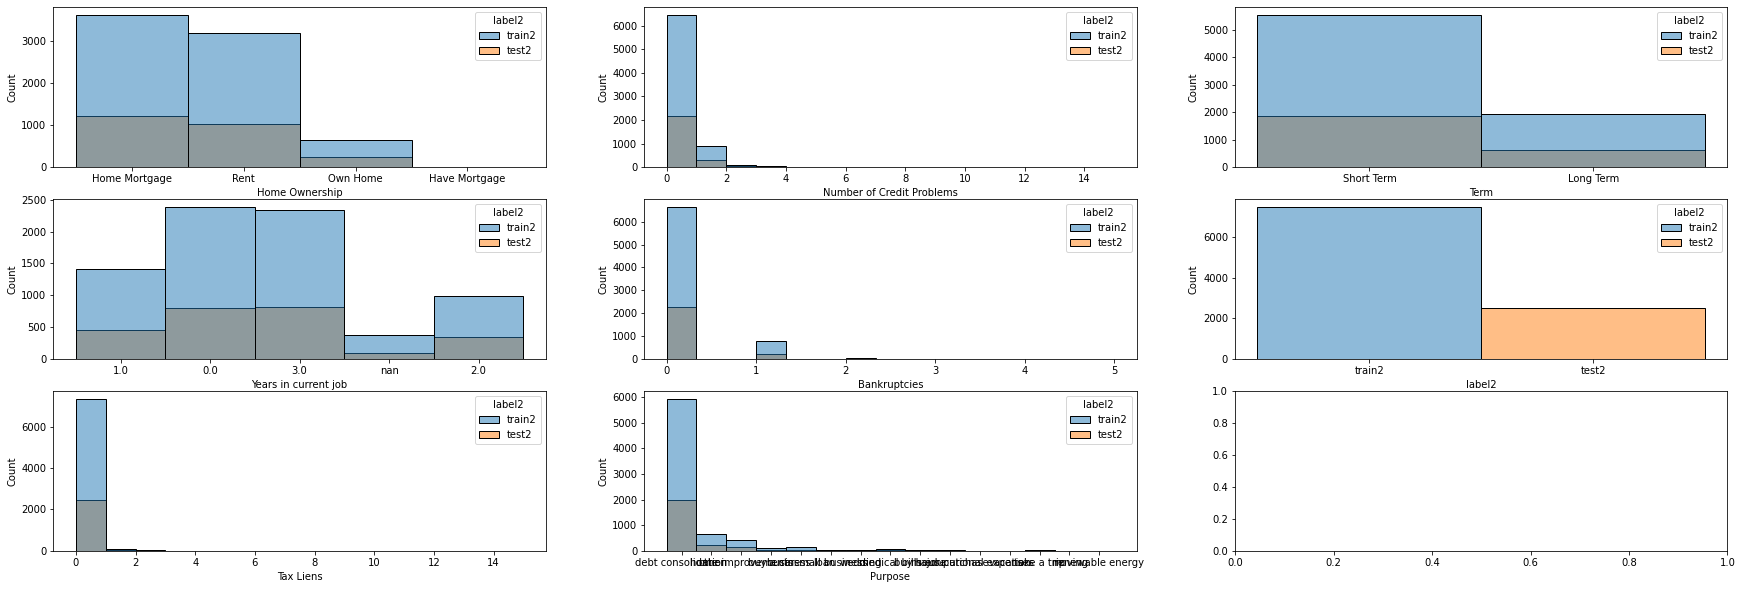

In [ ]:
# Проверим на схожеть признаков на обучающей и тестовой выборке.

# Для вещественных признаков код работает довольно долго, поэтому закоментил
# f, axes = plt.subplots(3,3 , figsize=(30, 10), sharex=False)
# for i, feature in enumerate(ob_all.featnum_list):
#     sns.histplot(data = ob_all.data, x = feature, hue="label2", ax=axes[i%3, i//3])

# Для категориальных
f, axes = plt.subplots(3,3 , figsize=(30, 10), sharex=False)
for i, feature in enumerate(cat_feature_names):
    sns.histplot(data = all[cat_feature_names], x = feature, hue="label2", ax=axes[i%3, i//3]) 

In [ ]:
# Видим что на тесте у признака Number of Credit Problems есть значение 15, отсутствующее на обучающей выборке.
# Число их невелико, тем не менее делаем замену. То же самое с Bankruptcies и Tax Liens:

test['Number of Credit Problems'] = np.where(test['Number of Credit Problems'] == 15, 7, test['Number of Credit Problems'])
test['Bankruptcies'] = np.where(test['Bankruptcies'] == 5, 4, test['Bankruptcies'])
test['Tax Liens'] = np.where(test['Tax Liens'] == 15, 7, test['Tax Liens'])

In [ ]:
# Заполняем отсутствующие данные
all['Years in current job'].fillna(0, inplace=True)
all['Bankruptcies'].fillna(0, inplace=True)

for col in cat_feature_names:
    if all[col].dtype == 'float64':
        all[col] = all[col].astype('int')
        all[col] = all[col].astype('int')

In [ ]:
# Credit Score больше 1000 однозначно указывает на невозврат кредита. Та же история с 'Current Loan Amount'. 
print(train[train['Credit Score'] > 1000][target].value_counts())
train[train['Current Loan Amount'] == 99999999][target].value_counts()

1    400
Name: Credit Default, dtype: int64


0    870
Name: Credit Default, dtype: int64

In [ ]:
# Как экономист знаю что кредитнх рейтингов выше 1000 не бывает. С точки зрения статистики сомнителен выброс немногих значений, которые 10 раз отличаются от остальных,
# и с точки зрения задачи сомнителен признак который в одиночку определяет цель. Видимо эьт 'Credit Score' на тестовой выборке ошибочные и все что выше 1000 нужно делить на 10. 
# Поделив на 10 мы ухудшим результаты на валидации, но улучшим Public Leaderboard.


# Run FeatureEngenering

In [ ]:
# Annual Income и Credit Score незаполненны в одинаковых местах, видимо отсутствие первого и стало причиной невозможности расчета второго.
# Что это за заемщики у которых отсутствуют эти данные - выяснить затруднительно, так как они не отличаются ни одним показателем кроме 
# Maximum Open Credit (1285725 против 782298) и Credit Default (0,34 против 0,27). Возможно это неработающие, живущие на ренте, и поэтому имеющие 
# максимальный взятый кредит больше среднего. Главное что данная категория заемщиков имеет повышенный процент невозврата кредита 

In [ ]:
# Создание экземпляра класса
ob_all = Preprocess(all)
#  Теперь работаем с  ob_all.data где содержатся данный и с train и с test

# создаем quant-4-Annual Income1 с корректным заполнением Annual Income
ob_all.data['Annual Income1'] = ob_all.data['Annual Income']
ob_all.quantile(['Annual Income1'], 4)
ob_all.data['quant-4-Annual Income1'] = np.where(ob_all.data['quant-4-Annual Income1'].isna(), -1, ob_all.data['quant-4-Annual Income1'])

#исправил кривизну Credit Score_label
ob_all.data['Credit Score_label'] = np.where(ob_all.data['Credit Score'].isna(), 1, 0)
ob_all.data['Credit Score'] = np.where(ob_all.data['Credit Score'] > 1000, ob_all.data['Credit Score']/10, ob_all.data['Credit Score'])

# Current Loan Amount == 999999 есть вариант заменить на случайную величину либо попробовать его спрогнозировать. Прогнозирование (for_cla()) значимых улучшений не дал, 
# поэтому просто заполняю значение рандомно    
ob_all.data['is_CLA'] = np.where(ob_all.data['Current Loan Amount'] == 99999999, 1, 0)
# for_cla()
ob_all.data['Current Loan Amount'] = np.where(ob_all.data['Current Loan Amount'] == 99999999, random.randint(10000,80000), ob_all.data['Current Loan Amount'])

# Отсутствующие данные Credit Score приравниваю 650, так как именно при этом значении наш таргет имеет схожие значения:
ob_all.data['Credit Score'] = np.where(ob_all.data['Credit Score'].isna(), 650, ob_all.data['Credit Score'])
# Отсутствующие данные Months since last delinquent приравниваю 40:
ob_all.data['Months since last delinquent'] = np.where(ob_all.data['Months since last delinquent'].isna(), 40, ob_all.data['Months since last delinquent'])

# Отсутствующие данные Annual Income заполняю по формуле  ob_all.data['Monthly Debt']/0.015
ob_all.data['Annual Income'] = np.where(ob_all.data['Annual Income'].isna(), ob_all.data['Monthly Debt']/0.015, ob_all.data['Annual Income'] )
# ob_all.data['Annual Income'] = np.where(ob_all.data['Annual Income'].isna(), 600000, ob_all.data['Annual Income'] )


#NewFeature

In [ ]:
# Генерирую признаки-категории  (список хранится в ob_all.feature_list_district). Например сгенерированный признак 'Home Ownership-Annual Income-mean' означает средний 
# Annual Income в разбивке по Home Ownership 
dict_item = ob_all.featnum_list  
for i in ob_all.featcat_list:
  aggfunc = ['mean']
  ob_all.district_engenering(i, dict_item, aggfunc, ob_all.data)
  ob_all.district_engenering(i, ['Tax Liens'], ['count'], ob_all.data)

# Генерирую признаки квантили
a = ob_all.featnum_list  + ob_all.feature_list_outer    # по чему считаем квантили
# ob_all.data[[z for z in a if z.split('-')[-1] == 'std']] = ob_all.data[[z for z in a if z.split('-')[-1] == 'std']].fillna(method='ffill')
ob_all.quantile(a, 4)

In [ ]:
#  Генерируем признаки отклонения 
ob_all.feature_2 = []
for i in [i for i in ob_all.quant_list if i.split('-')[-1] == 'Outer']:
  for ii in ob_all.featcat_list:
    name1 = ('quant-4-' + ii + '-' + i.split('-')[-3] + '-mean-Outer')
    name2 = ('quant-4-' + i.split('-')[-3])
    ob_all.data[name1 + '_' + name2] = ob_all.data['quant-4-' + ii + '-' + i.split('-')[-3] + '-mean-Outer'] + 10*ob_all.data['quant-4-' + i.split('-')[-3]]
    ob_all.feature_2.append(name1 + '_' + name2)
ob_all.feature_2 = list(set(ob_all.feature_2))

In [ ]:
#  ПРобуем сгенерировать осмысленные признаки
ob_all.data['Mon_Ann'] =  ob_all.data['Annual Income'] - ob_all.data['Monthly Debt']*50 # Что то типо превышение годового дохода от Ежемесячных долгов
ob_all.data['Cre_Ann'] =  ob_all.data['Annual Income'] - ob_all.data['Maximum Open Credit']  
ob_all.data['Credit Prob%'] =  ob_all.data['Number of Credit Problems']/ob_all.data['Number of Open Accounts']
ob_all.data['qCredit Prob%'] = np.where(ob_all.data['Credit Prob%'] > 0.25, 1, 0)
ob_all.data['Bal_Ann'] =  ob_all.data['Annual Income'] - 5*ob_all.data['Current Credit Balance'] 
ob_all.data['An_mo'] =  ob_all.data['Annual Income'] / ob_all.data['Monthly Debt'] 

ob_all.quantile(ob_all.data[['Mon_Ann']], 4)
ob_all.quantile(ob_all.data[['Cre_Ann']], 4)
ob_all.quantile(ob_all.data[['Bal_Ann']], 4)

# ob_all.data['AN/CCb'] = ob_all.data['Annual Income']/ob_all.data['Current Credit Balance']
# ob_all.feature_list_preprose = ['AN/CCb']

In [ ]:
#  Разбиваем Credit Score на группы, не по квантилям а по группам где различия по целевой наиболее отличаются
ob_all.quantile(['Credit Score'], 8)
display(pd.pivot_table(ob_all.data,
               index = 'quant-8-Credit Score',
               values = [target, 'Credit Score'],
               aggfunc = ['count', 'mean', 'min']
               ))
# из пивот таблицы видим что надо разбить со следующими бинами:
bins = [579, 669, 739, 799, 850]
ob_all.data['Credit Score Cat'] = pd.cut(ob_all.data['Credit Score'], bins=bins, labels=False)
ob_all.data['Credit Score Cat'].fillna(-1, inplace=True)

count               ...            min             
                     Credit Default Credit Score  ... Credit Default Credit Score
quant-8-Credit Score                              ...                            
0                              1747         2317  ...            0.0        585.0
1                               149          199  ...            0.0        651.0
2                               930         1269  ...            0.0        666.0
3                               904         1221  ...            0.0        704.0
4                               978         1303  ...            0.0        720.0
5                               983         1284  ...            0.0        731.0
6                               933         1247  ...            0.0        739.0
7                               876         1160  ...            0.0        745.0

[8 rows x 6 columns]

In [ ]:
#  Возраст заемщика. Предполжили что зависит от Years in current job + Years of Credit History
ob_all.data['age'] = ob_all.data['Years in current job'].astype('float') + ob_all.data['Years of Credit History']
ob_all.quantile(ob_all.data[['age']], 8)

ob_all.data['age_categ'] = ob_all.data['quant-8-age'].map({0:'0', 
                                                                        1:'1', 
                                                                       2:'1', 
                                                                       3:'1', 
                                                                       4:'2', 
                                                                       5:'2', 
                                                                       6:'3', 
                                                                       7:'4', 
})
ob_all.data['age_categ'].fillna(value = '-1', inplace = True)
ob_all.data['age'].fillna(value = -1, inplace = True)

In [ ]:
%%time

int_float = ob_all.data.select_dtypes(include=('float', 'int')).columns
feature_list = ['Annual Income', 'Maximum Open Credit', 'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt']

features = new_features(ob_all.data, feature_list)
ob_all.data = pd.concat([ob_all.data, features], axis=1)
ob_all.data.fillna(value = 0, inplace = True)

5it [00:00, 373.40it/s]

CPU times: user 71.2 ms, sys: 6.19 ms, total: 77.4 ms
Wall time: 78 ms


# Выбор фичей

In [ ]:
# Пробовал разные способобы из класса FeatureSelect, но все оказались не очень эффективными.
# В частности в RFE я не нашел способа задать категориальные признаки, а без этого перебор уже не корректен. Поэтому 
# выбор полезных фичей осуществлял уже на стадии обучения, при помощи кросвалидации. Уже готовый результат выбора поместил в best:

In [ ]:
best = ['Home Ownership',
 'Years in current job',
 'Tax Liens',
 'Number of Credit Problems',
 'Bankruptcies',
 'Purpose',
 'Term',
#  'Annual Income',
 'Number of Open Accounts',
#  'Years of Credit History',
 'Maximum Open Credit',
 'Months since last delinquent',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
#  'Credit Score',
 'quant-4-Annual Income',
 'quant-4-Number of Open Accounts',
 'quant-4-Years of Credit History',
 'quant-4-Maximum Open Credit',
#  'quant-4-Months since last delinquent',
 'quant-4-Current Loan Amount',
 'quant-4-Current Credit Balance',
#  'quant-4-Monthly Debt',
#  'quant-4-Credit Score',
# 'dd',
# 'AN/CCb'
# 'Purpose-Credit Score-mean-Outer',
'Term-Current Loan Amount-mean-Outer',
'Purpose-Current Loan Amount-mean-Outer',
'Purpose-Annual Income-mean-Outer',
# 'Bankruptcies-Credit Score-mean-Outer',
'Number of Credit Problems-Credit Score-mean-Outer',
# 'Number of Credit Problems-Current Loan Amount-mean-Outer',
# 'Tax Liens-Credit Score-mean-Outer',
# 'Tax Liens-Current Loan Amount-mean-Outer',
# 'Years in current job-Credit Score-mean-Outer',
# 'Years in current job-Current Loan Amount-mean-Outer',
# 'Home Ownership-Credit Score-mean-Outer',
# 'Home Ownership-Current Credit Balance-mean-Outer',
'Credit Score Cat'
 ]

# ModelRunOld

## Cat

In [ ]:
feature = best

# Разбиваем данные на тест и трейн и out-sample
ob_all.create_X_train(feature, target, 0, drop='train_train')
ob_all.create_X_train(feature, target, 0, drop='train_test')
ob_all.create_X_train(feature, target, 0, drop='test')
ob_all.create_X_train(feature, target, 0, drop='none')
print('size X_train: {}'.format(ob_all.X_train.shape))
print('size X_test: {}'.format(ob_all.X_test.shape))

cat_features = ob_all.featcat_list #+ ['age_categ']

"убрали: Index([], dtype='object') число пропусков больше: 0"

"убрали: Index([], dtype='object') число пропусков больше: 0"

"убрали: Index([], dtype='object') число пропусков больше: 0"

"убрали: Index([], dtype='object') число пропусков больше: 0"

size X_train: (7500, 24)
size X_test: (2500, 24)


### Cat cros_val

In [ ]:
# Пробуем разные комбинации гипермараметров для данного набора признаков.

In [ ]:

# for md in [2,3,4]:
#   for lr in [0.05, 0.088, 0.1, 0.15]:   
#       params = {}
#       params['loss_function'] = 'Logloss'
#       params['iterations'] = 500
#       params['custom_loss'] = ['AUC', 'F1']
#       params['random_seed'] = 63
#       params['learning_rate'] = lr
#       params['depth'] = md

#       cv_data = cv(params = params,
#           pool = Pool(ob_all.X_train, label = ob_all.y_train, cat_features=cat_features),
#           fold_count=5,
#           shuffle=True,
#           partition_random_seed=0,
#           plot=True,
#           stratified=True,
#           verbose=False
#       )

#       best_value = np.min(cv_data['test-Logloss-mean'])
#       best_iter = np.argmin(cv_data['test-Logloss-mean'])
      
#       print('LR: {} Md: {} Shape: {} Best validation Logloss score, stratified: {:.4f}±{:.4f} on step {} test-AUC-mean: {} test-F1-mean: {}'.format(lr, md, ob_all.X_train_train.shape,
#         best_value,
#         cv_data['test-Logloss-std'][best_iter],
#         best_iter,
#         cv_data['test-AUC-mean'][best_iter],
#         cv_data['test-F1-mean'][best_iter]))

In [ ]:
# list_.append('Shape: {} Best validation Logloss score, stratified: {:.4f}±{:.4f} on step {} test-AUC-mean: {} test-F1-mean: {}'.format(ob_all.X_train_train.shape,
#     best_value,
#     cv_data['test-Logloss-std'][best_iter],
#     best_iter,
#     cv_data['test-AUC-mean'][best_iter],
#     cv_data['test-F1-mean'][best_iter])
# )
# list_

### Baseline

In [ ]:
# Предсказываем на основе модели с лучшими гиперпараметрами и набором признаков
 
baseline = catb.CatBoostClassifier(iterations=260, 
                                  nan_mode='Min',
                                  # eval_metric=params['custom_loss'] , 
                                  silent=True, 
                                  class_weights=[1, 2],
                                  # early_stopping_rounds=20,
                                  random_state=42,
                                  learning_rate = 0.088, 
                                  depth = 3)

baseline.fit(ob_all.X_train, ob_all.y_train, 
            cat_features=cat_features)

y_all_pred = baseline.predict(ob_all.X_train)
y_test_pred = baseline.predict(ob_all.X_test)

y_all_pred_proba = baseline.predict_proba(ob_all.X_train)[:, 1]
y_test_pred_proba = baseline.predict_proba(ob_all.X_test)[:, 1]


In [ ]:
pd.DataFrame(baseline.feature_importances_, index = ob_all.X_train_train.columns).sort_values(by = 0, ascending=False)

,0
Current Loan Amount,36.618723
Term-Current Loan Amount-mean-Outer,14.213779
Purpose-Current Loan Amount-mean-Outer,10.090016
Term,7.275645
Purpose-Annual Income-mean-Outer,5.148475
Number of Credit Problems-Credit Score-mean-Outer,4.396279
Maximum Open Credit,4.020801
Monthly Debt,3.295497
Credit Score Cat,2.245586
Current Credit Balance,2.092861


## XGB

In [ ]:
# Так как xgb не работает с категориальными признаками создаю их с помощь dummies
df = pd.get_dummies(ob_all.data[['Home Ownership', 'Purpose', 'Term', 'Years in current job']])
df.columns = [i.replace('<', '__') for i in list(df.columns)]
ob_all.featur_forXGB = list(df.columns)
ob_all.data = pd.concat([ob_all.data, df], axis=1)

In [ ]:
featureXGB = feature + ob_all.featur_forXGB
featureXGB.remove('Home Ownership')
featureXGB.remove('Purpose')
featureXGB.remove('Term')
featureXGB.remove('Years in current job')

ob_all.create_X_train(featureXGB, target, 0, drop='train_train')
ob_all.create_X_train(featureXGB, target, 0, drop='train_test')
ob_all.create_X_train(featureXGB, target, 0, drop='test')
ob_all.create_X_train(featureXGB, target, 0, drop='none')

print('size X_train: {}'.format(ob_all.X_train.shape), 'size y_train: {}'.format(ob_all.y_train.shape))
print('size X_test: {}'.format(ob_all.X_test.shape))

"убрали: Index([], dtype='object') число пропусков больше: 0"

"убрали: Index([], dtype='object') число пропусков больше: 0"

"убрали: Index([], dtype='object') число пропусков больше: 0"

"убрали: Index([], dtype='object') число пропусков больше: 0"

size X_train: (7500, 46) size y_train: (7500,)
size X_test: (2500, 46)


### XGB_cv

In [ ]:
# result_final = pd.DataFrame()
# for md in [2, 3, 4]:
#  for lr in [0.05, 0.1, 0.15]:
#     params={"max_depth":md, "min_child_weight":2, "eta": 0.1, "subsamples":0.75, \
#             'scale_pos_weight': 2.5, "colsample_bytree":0.8, "objective" : "binary:logistic", "eval_metric": "logloss", 'learning_rate':lr}
#     rounds = 250
#     data_dmat = xgb.DMatrix(data = ob_all.X_train, label = ob_all.y_train)
#     result = xgboost.cv(params=params, dtrain=data_dmat, num_boost_round=rounds, early_stopping_rounds=50, as_pandas=True, seed=23333, metrics='auc')
#     result['max_dep'] = md
#     result['lr'] = lr
#     result['iter'] = result.index
#     result_final = result_final.append(result[['test-auc-mean', 'max_dep', 'lr', 'iter']][-1:], ignore_index = True) 

In [ ]:
# 	test-auc-mean	max_dep	lr	iter
# 0	0.712040	2	0.05	249
# 1	0.713259	2	0.10	150
# 2	0.712784	2	0.15	119
# 3	0.713860	3	0.05	170
# **4	0.713881	3	0.10	84
# 5	0.711923	3	0.15	71
# 6	0.711455	4	0.05	114
# 7	0.710941	4	0.10	51
# 8	0.710960	4	0.15	38

### XGB

In [ ]:
modelXGB = xgboost.XGBClassifier(n_estimators=84, scale_pos_weight = 2, max_depth = 3, learning_rate=0.1)
# modelXGB = xgboost.XGBClassifier(n_estimators=91, scale_pos_weight = 2.5, max_depth = 3, learning_rate=0.1)

modelXGB.fit(ob_all.X_train, ob_all.y_train)

y_train_pred_G = modelXGB.predict(ob_all.X_train_train)
y_valid_pred_G = modelXGB.predict(ob_all.X_train_test)
y_all_pred_G   = modelXGB.predict(ob_all.X_train)
y_test_pred_G  = modelXGB.predict(ob_all.X_test)

# get_classification_report(ob_all.y_train_train, y_train_pred_G, ob_all.y_train_test, y_valid_pred_G)

y_valid_proba_G = modelXGB.predict_proba(ob_all.X_train_test)[:, 1]
y_all_pred_proba_G = modelXGB.predict_proba(ob_all.X_train)[:, 1]
y_test_pred_proba_G = modelXGB.predict_proba(ob_all.X_test)[:, 1]

# show_proba_calibration_plots(y_valid_proba_G, ob_all.y_train_test)

In [ ]:
pd.DataFrame(data = modelXGB.feature_importances_, index = ob_all.X_train.columns).sort_values(by = 0)

,0
Home Ownership_Own Home,0.000000
Home Ownership_Have Mortgage,0.000000
Credit Score Cat,0.000000
Purpose_educational expenses,0.000000
Purpose_home improvements,0.000000
Purpose_major purchase,0.000000
quant-4-Current Credit Balance,0.000000
quant-4-Current Loan Amount,0.000000
Purpose_buy house,0.000000
quant-4-Number of Open Accounts,0.000000


## SUM_model

In [ ]:
# Так как xgb и catboost работают немножко по разному попробовал скомбинировать их прогнозы 
# Cовместил прогнозы catboost и xgb по следующей схеме: если сумма вероятностей исхода 1 по catboost и xgb больше 1, то берем 1, если нет, то 0   
# По условиям задачи полнота и точность должны быть выше 50%. Я в параметрах моделей указывал на несбалансированность данных, поэтому работу с порогами опущу,

In [ ]:
# sum = pd.DataFrame(zip(y_all_pred_proba_G, y_all_pred_proba, y_all_pred_G, y_all_pred, ob_all.y_train), \
#                columns=['y_valid_proba_G', 'y_valid_proba' ,'y_valid_pred_G', 'y_valid_pred', 'real'])
# sum['sum_integ'] = np.where(((sum['y_valid_proba_G'] + sum['y_valid_proba'])/2 >= 0.5), 1, 0)
# print(classification_report(sum['real'], sum['sum_integ']))


              precision    recall  f1-score   support

         0.0       0.84      0.76      0.80      5387
         1.0       0.50      0.63      0.56      2113

    accuracy                           0.72      7500
   macro avg       0.67      0.69      0.68      7500
weighted avg       0.74      0.72      0.73      7500



In [ ]:
sum_test = pd.DataFrame(zip(y_test_pred_proba_G, y_test_pred_proba, y_test_pred_G, y_test_pred), \
                       columns=['y_valid_proba_G', 'y_valid_proba', 'y_valid_pred_G', 'y_valid_pred'])
sum_test['sum'] = sum_test['y_valid_pred_G'] + 1*sum_test['y_valid_pred']
sum_test['sum'].value_counts()
sum_test['sum_integ'] = np.where(((sum_test['y_valid_proba_G'] + sum_test['y_valid_proba'])/2 >= 0.53), 1, 0)
sum_test

,y_valid_proba_G,y_valid_proba,y_valid_pred_G,y_valid_pred,sum,sum_integ
0,0.553990,0.597877,1.0,1.0,2.0,1
1,0.649824,0.772015,1.0,1.0,2.0,1
2,0.478273,0.454277,0.0,0.0,0.0,0
3,0.422039,0.414524,0.0,0.0,0.0,0
4,0.440529,0.381570,0.0,0.0,0.0,0
...,...,...,...,...,...,...
2495,0.005403,0.007526,0.0,0.0,0.0,0
2496,0.452860,0.545701,0.0,1.0,1.0,0
2497,0.468804,0.588058,0.0,1.0,1.0,0
2498,0.400678,0.416795,0.0,0.0,0.0,0


# Submission 

In [ ]:
file = '139-50-50sum_submison_best_2.5.csv'
Price = np.where(((sum_test['y_valid_proba_G'] + sum_test['y_valid_proba'])/2 >= 0.50), 1, 0)
pd.DataFrame({'id': ob_all.data[ob_all.data['label'] == 'test'].index,'Credit Default': Price.astype(int)}).to_csv('/content/drive/MyDrive/Colab Notebooks/course_work2/data/submison/' + file, index=False)